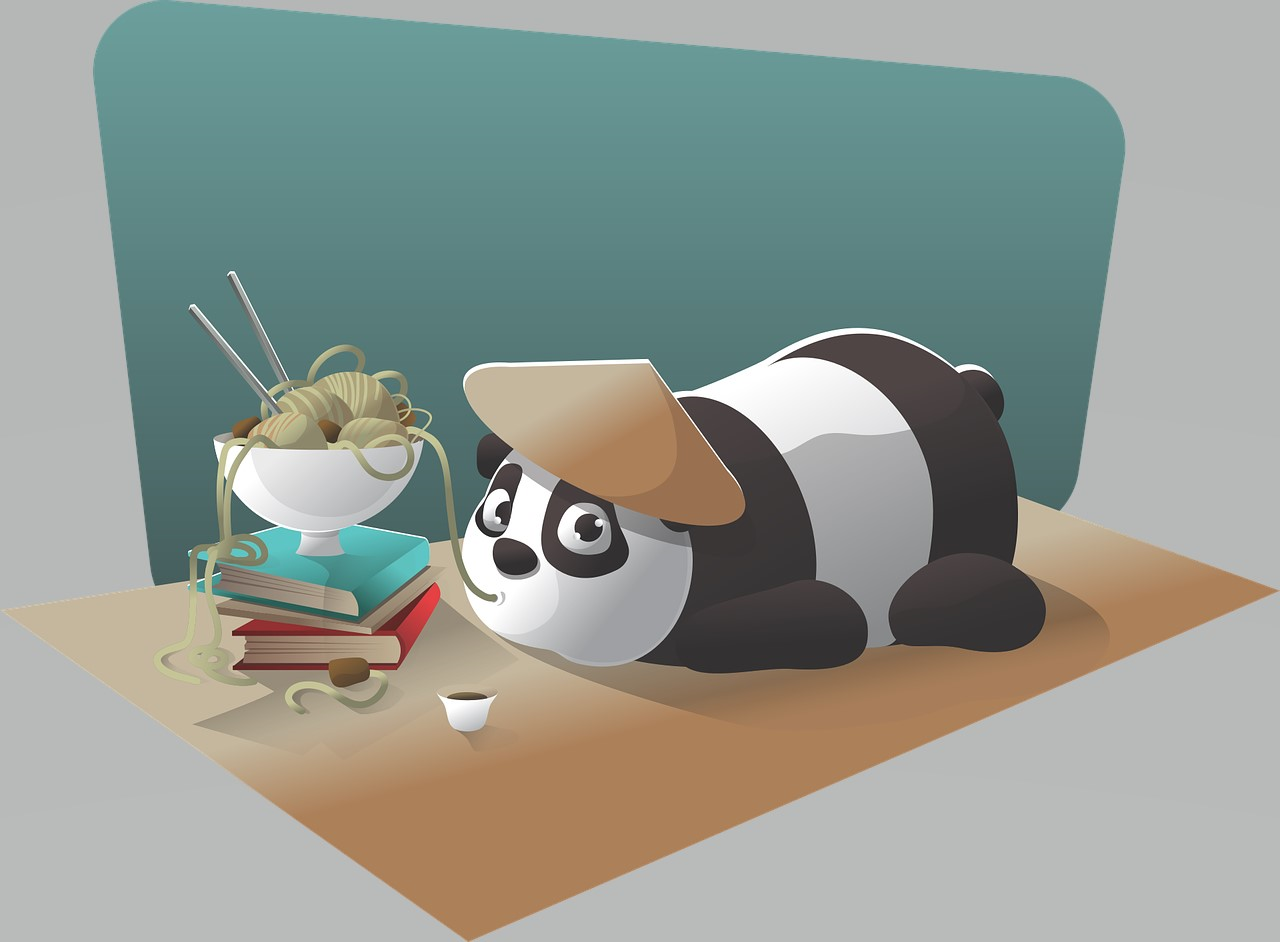

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv(r"C:\Univ\3rd Semester\Data science\Tiime Series\Section 3\S_3_L_11\Index2018.csv")

In [62]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [63]:
df.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null object
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [65]:
df['date'].describe()

count           6269
unique          6269
top       28/05/2013
freq               1
Name: date, dtype: object

<div class="alert alert-block alert-info">

<span style="color:black">



As we can see above, the ``date`` column is identified as ``"Object"`` datatype instead of ``"Datetime"`` datatype. 

To instruct Pandas to convert the values of a specific column as ``datetime`` datatype, use the **``"parse_dates"``** argument when loading the data using read_csv method and mention the column name which you wanna convert.

While loading csv file contain ``date`` column.We have two approaches to make pandas to recognize date column format specified in the **``"parse_dates"``** argument  i.e

    • Pandas explicit recognize the format by arg ``date_parser``=mydateparser

    • Pandas implicit recognize the format by agr ``infer_datetime_format``=True

Because the format of the date in the dataset is "%m/%d/%Y", Please refer below for the available options






<span>
</div>

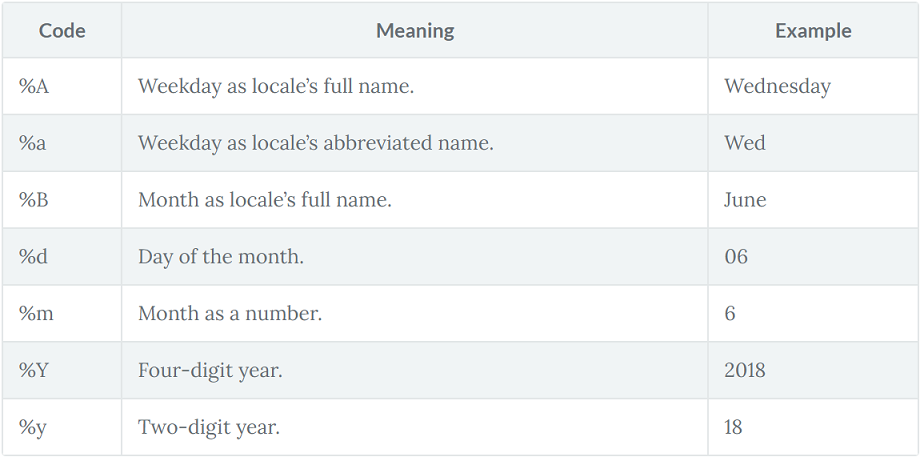

The ``date_parser`` argument accepts a function (user defined) which indicates the date format in the dataset which will be used by the parse_dates functio to interpret the date format correctly.

The default date format is  "%m-%d-%Y" but our date is in the format of "%d/%m/%Y", HENCE WE NEED TO SPECIFY OUR DATE FORMAT AND PASS IT IN THE ARGUMENT FOR THE PANDAS TO RECOGNIZE IT CORRECTLY

OR

we can simply pass the ``"dayfirst"`` argument = ``True`` in the read_csv so that the default date format of ``"%m-%d-%Y"`` will be converted into ``"%d-%m-%Y"`` automatically regardless of any seperator inbetween the dates like "-" or "/"

In [70]:
mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y") #specify the existing date time format in the dataset

In [71]:
df=pd.read_csv(r"C:\Univ\3rd Semester\Data science\Tiime Series\Section 3\S_3_L_11\Index2018.csv", parse_dates=['date'],date_parser = mydateparser)

In [72]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [73]:
df.tail()

,date,spx,dax,ftse,nikkei
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88
6268,2018-01-29,2853.528411,13324.48,7671.533300,23629.34


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null datetime64[ns]
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [69]:
df['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

<div class="alert alert-block alert-info">

<span style="color:black">

Now we can see  that the ``"date"`` column is now of the ``"datetime64[ns]"`` datatype (where ns is Nanoseconds). The main objective of changing the datatype of the ``"date"`` column is that to apply the ``"dt"`` (ie- date) functions on the data to extract date, day, month, year and time  from it for analysis purposes

In [48]:
print("\nYear:")
print(df['date'].dt.year.head())
print('\n',df['date'].dt.year.tail())
print("\nMonth:")
print(df['date'].dt.month.head())
print('\n',df['date'].dt.month.tail())
print("\nDay:")
print(df['date'].dt.day.head())
print(df['date'].dt.day.tail())
print("\nHour:")
print(df['date'].dt.hour.head())  #as the data doesn't have hours value in it, it will be displayed as zero
print("\nMinute:")
print(df['date'].dt.minute.head())#as the data doesn't have minute value in it, it will be displayed as zero
print("\nSecond:")
print(df['date'].dt.second.head())#as the data doesn't have second value in it, it will be displayed as zero
print("\nWeekday:")
print(df['date'].dt.weekday_name.head())


Year:
0    1994
1    1994
2    1994
3    1994
4    1994
Name: date, dtype: int64

 6264    2018
6265    2018
6266    2018
6267    2018
6268    2018
Name: date, dtype: int64

Month:
0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

 6264    1
6265    1
6266    1
6267    1
6268    1
Name: date, dtype: int64

Day:
0     7
1    10
2    11
3    12
4    13
Name: date, dtype: int64
6264    23
6265    24
6266    25
6267    26
6268    29
Name: date, dtype: int64

Hour:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Minute:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Second:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Weekday:
0       Friday
1       Monday
2      Tuesday
3    Wednesday
4     Thursday
Name: date, dtype: object


<div class="alert alert-block alert-warning">
<span style="color:black">

Sometimes if you don't wanna convert the date values in the dataset in to ``"DateTime"`` datatype while loading but wanna do it later, then u can use the ``"pd.to_datetime"`` function with the argument  ``format='%d/%m/%Y'`` (Which is the dataset's date format)

we can simply pass the ``"dayfirst"`` argument = ``True`` in the read_csv so that the default date format of ``"%m-%d-%Y"`` will be converted into ``"%d-%m-%Y"`` automatically regardless of any seperator inbetween the dates like "-" or "/"

In [135]:
df=pd.read_csv(r"C:\Univ\3rd Semester\Data science\Tiime Series\Section 3\S_3_L_11\Index2018.csv")

In [76]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null object
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [136]:
df['date'] = pd.to_datetime(   df['date'] , format='%d/%m/%Y'  ) #specify the existing date format in the dataset

In [78]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null datetime64[ns]
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [80]:
df['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [55]:
print("\nYear:")
print(df['date'].dt.year.head())
print('\n',df['date'].dt.year.tail())
print("\nMonth:")
print(df['date'].dt.month.head())
print('\n',df['date'].dt.month.tail())
print("\nDay:")
print(df['date'].dt.day.head())
print(df['date'].dt.day.tail())
print("\nHour:")
print(df['date'].dt.hour.head())  #as the data doesn't have hours value in it, it will be displayed as zero
print("\nMinute:")
print(df['date'].dt.minute.head())#as the data doesn't have minute value in it, it will be displayed as zero
print("\nSecond:")
print(df['date'].dt.second.head())#as the data doesn't have second value in it, it will be displayed as zero
print("\nWeekday:")
print(df['date'].dt.weekday_name.head())


Year:
0    1994
1    1994
2    1994
3    1994
4    1994
Name: date, dtype: int64

 6264    2018
6265    2018
6266    2018
6267    2018
6268    2018
Name: date, dtype: int64

Month:
0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int64

 6264    1
6265    1
6266    1
6267    1
6268    1
Name: date, dtype: int64

Day:
0     7
1    10
2    11
3    12
4    13
Name: date, dtype: int64
6264    23
6265    24
6266    25
6267    26
6268    29
Name: date, dtype: int64

Hour:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Minute:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Second:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Weekday:
0       Friday
1       Monday
2      Tuesday
3    Wednesday
4     Thursday
Name: date, dtype: object


<div class="alert alert-block alert-warning">
<span style="color:black">
    
or Else we can also use the ``.astype()`` function to convert the datatype into the specified datatype (BUT WE CANNOT SPECIFY THE DATE FORMAT)
    </span>

In [24]:
df=pd.read_csv(r"C:\Univ\3rd Semester\Data science\Tiime Series\Section 3\S_3_L_11\Index2018.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null object
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [26]:
df['date'] = df['date'].astype('datetime64[ns]')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
date      6269 non-null datetime64[ns]
spx       6269 non-null float64
dax       6269 non-null float64
ftse      6269 non-null float64
nikkei    6269 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [28]:
print("\nYear:")
print(df['date'].dt.year.head())
print("\nMonth:")
print(df['date'].dt.month.head())
print("\nDay:")
print(df['date'].dt.day.head())
print("\nHour:")
print(df['date'].dt.hour.head())  #as the data doesn't have hours value in it, it will be displayed as zero
print("\nMinute:")
print(df['date'].dt.minute.head())#as the data doesn't have minute value in it, it will be displayed as zero
print("\nSecond:")
print(df['date'].dt.second.head())#as the data doesn't have second value in it, it will be displayed as zero
print("\nWeekday:")
print(df['date'].dt.weekday_name.head())


Year:
0    1994
1    1994
2    1994
3    1994
4    1994
Name: date, dtype: int64

Month:
0     7
1    10
2    11
3    12
4     1
Name: date, dtype: int64

Day:
0     1
1     1
2     1
3     1
4    13
Name: date, dtype: int64

Hour:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Minute:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Second:
0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int64

Weekday:
0      Friday
1    Saturday
2     Tuesday
3    Thursday
4    Thursday
Name: date, dtype: object


<div class="alert alert-block alert-info">
<span style="color:black">


Sometimes it will be usefull to make the date column as ``index`` of the dataframe to select a frequency for the time-series analysis and also when we are plotting the data by setting the Date as its index we will get the x-axis of the plot by default with time specifications which is one of the ebst advantages of having the date column as index so that we donot have to worry about the time axis for all the time-series plots
</span>
</div>

In [81]:
mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y")
df=pd.read_csv(r"C:\Univ\3rd Semester\Data science\Tiime Series\Section 3\S_3_L_11\Index2018.csv", parse_dates=['date'],date_parser = mydateparser)

In [82]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [137]:
df.set_index('date', inplace=True)

In [84]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# ASFREQ()

By setting the frequency we can modify the dataset

In [139]:
df.index

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6269, freq=None)

from the above result not that the freq=None at the last which indicates that there are no frequency assigned to the dataset.
But we know that there is a monthly frequency or a business day frequency is present and we need to assign it

In [140]:
df.asfreq('d')
# where the asfreq() accepts only 4 values 'd' for daily , 'w' for weekly, 'h' for hourly and 'a' for annually/yearly
# and 'b' for only business days (ie) from Monday to Friday only

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


As we can see once the frequence is set for daily , the missing dates will be created with NaN values which are ideally the weekends (Saturdays and Sundays)

In [142]:
df=df.asfreq('b') # for business days only as the dataset is for the financial stock prices which recorded only on weekdays
df.head(10)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-17,473.30,2115.56,3407.83,18725.37
1994-01-18,474.25,2130.35,3437.01,18514.55
1994-01-19,474.30,2132.52,3475.15,19039.40


Now we can see that the saturdays and sundays are omitted in the frequency

In [143]:
df.index

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6277, freq='B')

Note that the frequency has been chaged to 'B'

# Rolling statistics (Moving Average & EWMA)

In some cases if we wanna calcualte the mean of the constantlyl varying data and to check whether the mean is also constantly changing like <font color='red'> **moving average**</font> , we can check that by using rolling statistics

In [7]:
df = pd.read_csv(r'C:\Univ\3rd Semester\Data science\Tiime Series\UDEMY_TSA_FINAL\Data\starbucks.csv', index_col='Date', parse_dates=True)

In [8]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


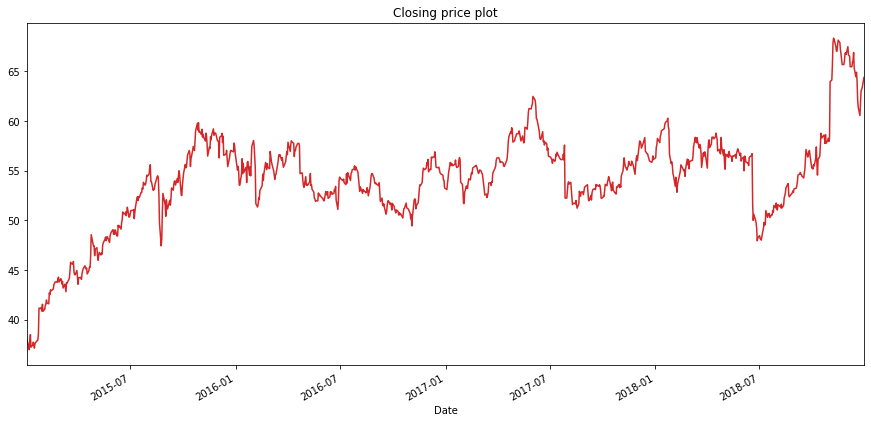

In [31]:
df.Close.plot(figsize=(15,7),title='Closing price plot',c='tab:red')

as we can see above the plot of closing price have more variance at different time periods, and we wanna check the mean of the price.

We know that the trend/cycle is here in 12 months time period as we are having 4 years of data

In [92]:
df['close_roll_mean'] = df['Close'].rolling(30).mean()

In [93]:
df.head(20)

,Close,Volume,month,close_roll_mean
Date,,,,
2015-01-02,38.0061,6906098,January,NaN
2015-01-05,37.2781,11623796,January,NaN
2015-01-06,36.9748,7664340,January,NaN
2015-01-07,37.8848,9732554,January,NaN
2015-01-08,38.4961,13170548,January,NaN
2015-01-09,37.2361,27556706,January,NaN
2015-01-12,37.4415,10021486,January,NaN
2015-01-13,37.7401,11040702,January,NaN
2015-01-14,37.5301,9295084,January,NaN


From above we can see that the mean has been calcualted for every 12 data points and updated down the table.
The first 11 rows will be NaN as there wasn't any data before that to compute the average.

We can also calculate other aggregation func apart from mean 

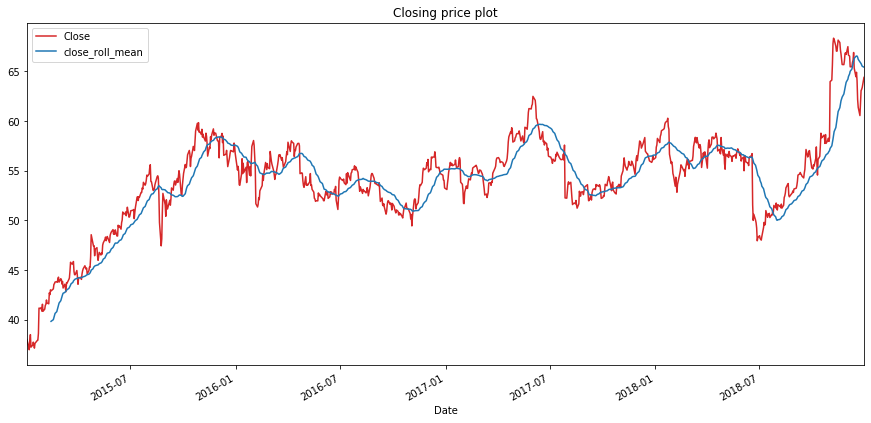

In [94]:
df.Close.plot(figsize=(15,7),title='Closing price plot',c='tab:red')
df.close_roll_mean.plot(c='tab:blue')
plt.legend();

form the above figure we can see that average line (blue) moves along with the data, if we wanna take a clost look filter it by just one year

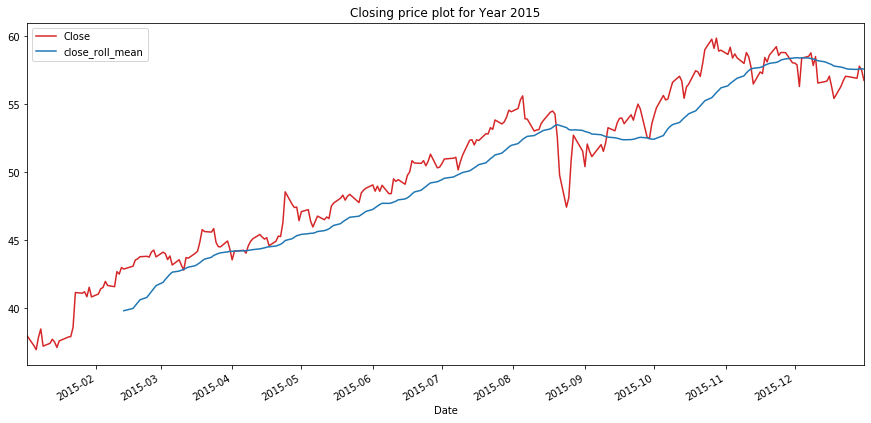

In [87]:
df['2015']['Close'].plot(figsize=(15,7),title='Closing price plot for Year 2015',c='tab:red')
df['2015']['close_roll_mean'].plot(c='tab:blue')
plt.legend();

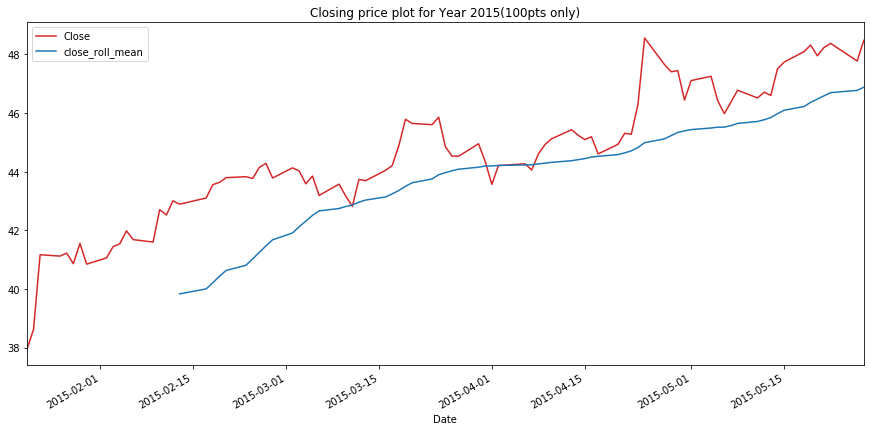

In [88]:
df['2015']['Close'].iloc[12:100].plot(figsize=(15,7),title='Closing price plot for Year 2015(100pts only)',c='tab:red')
df['2015']['close_roll_mean'].iloc[12:100].plot(c='tab:blue')
plt.legend();

if we increase the rolling window we can see a smooth curve

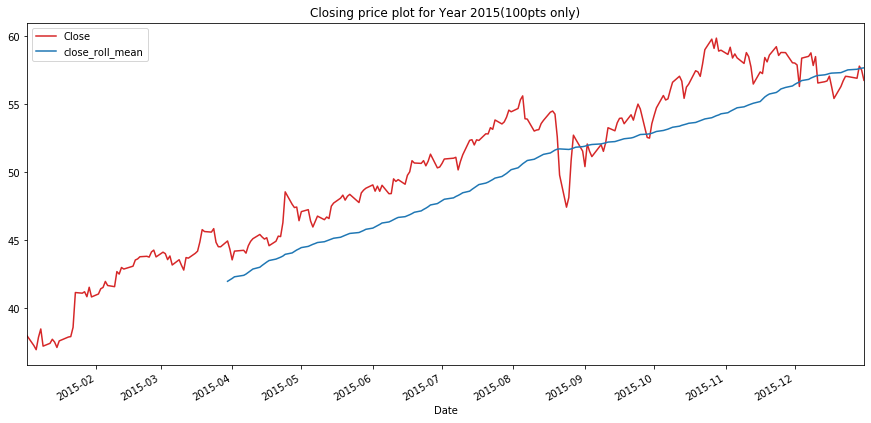

In [55]:
df['close_roll_mean'] = df['Close'].rolling(60).mean()
df['2015']['Close'].plot(figsize=(15,7),title='Closing price plot for Year 2015(100pts only)',c='tab:red')
df['2015']['close_roll_mean'].plot(c='tab:blue')
plt.legend();

Notice the first empty space in the blue line , that is because of the NaN values in the first 59 rows

The only disadvantage of this Moving average is that the window size will be same for the entire dataset (ie) if we have a 10 year data for example and we set the rolling statistics as 30 as we are recording daily , now we want give more weightage to the recent data points rather than to the past 1st year data as the relevancy will be less over there. This can be achieved by <font color='red'> **Exponential Weighted Moving Average**</font>.

Other disadvantages of Moving average is that 

• it can depict only the mean is constant or varying over time and 

• if there is any drastic changes like ups or downs the mean will be affected more and wont be accurate

• There will be some NaN values at the first rows based on the number of rolling window we choose

• The values will never reach peak as we are taking average of the window size

Thats why we prefer the EWMA over MA

In [130]:
df= pd.read_csv(r"Downloads\AirPassengers.csv",index_col='Month',parse_dates=True)

In [97]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [98]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

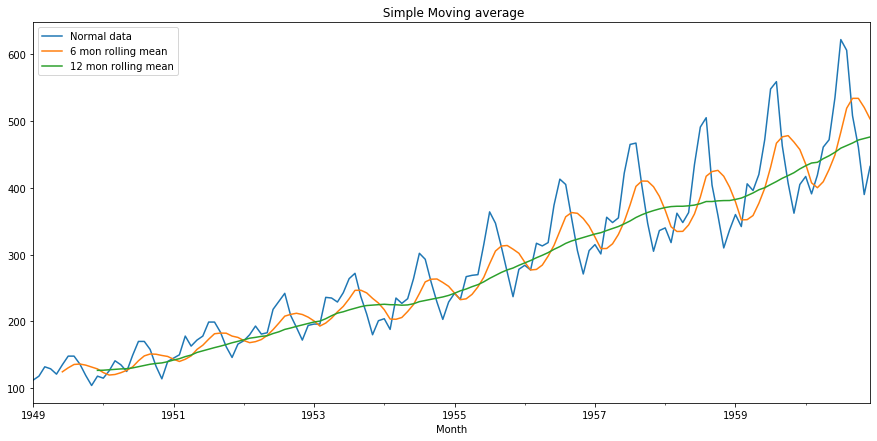

In [132]:
df['#Passengers'].plot(figsize=(15,7),label='Normal data')
df['#Passengers'].rolling(6).mean().plot(title=' Simple Moving average',label='6 mon rolling mean')
df['#Passengers'].rolling(12).mean().plot(label='12 mon rolling mean')
plt.legend()
plt.show()


From above we can see that the Moving average for 6 month and 12 month have some lags empty at start 

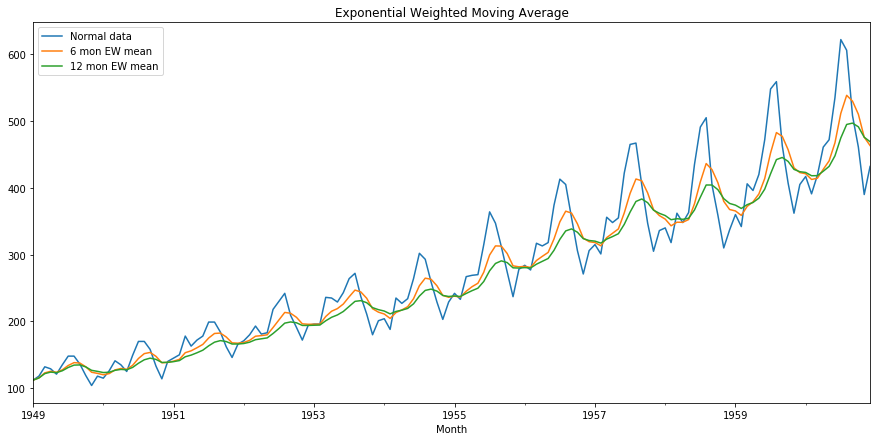

In [134]:
df['#Passengers'].plot(figsize=(15,7),label='Normal data')
df['#Passengers'].ewm(span=6).mean().plot(title='Exponential Weighted Moving Average', label='6 mon EW mean')
df['#Passengers'].ewm(span=12).mean().plot(label='12 mon EW mean')
plt.legend()
plt.show()

we can see that there are no empty lags at start of the plot and the mean at the recent years are more weighted than mean of the previous years

# Expanding statistics

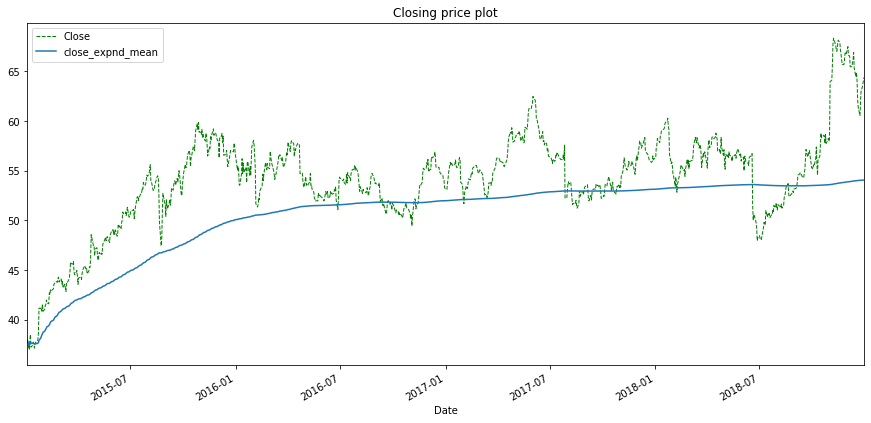

In [61]:
df['close_expnd_mean'] = df['Close'].expanding().mean()
df.Close.plot(figsize=(15,7),title='Closing price plot',c='green',lw=1,ls='--')
df.close_expnd_mean.plot(c='tab:blue')
plt.legend();

Expanding mean gives the mean of all rows till the data point in interest

# Resampling

In some cases if we want to do some aggregation function such as:

  we have a daily data of temperature for 5 years but due to computational complexity we cannot include all the data points, instead
    we want to take the average of each month and use that averages alone for the 5 year data for tiem series.(but this average is <font color='red'>**not moving average** or **EWMA**</font> just a simple plain average  and the end result will be a new dataframe)
    
Inorder to do such mean aggregation over a month or year as per the requriement Pandas package provide a special method called
    .resample() which takes in 2 arguemnts such as ``rule paramenter`` and aggregation func.
    
The rule parameter indicates the frequency with which to apply the aggregation function (monthly, yearly or quaterly, etc..,)
    

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

in the below code we can simply use parse_dates=True to identify any datetime column inti datetime datatype while loading the data

In [62]:
df = pd.read_csv(r'C:\Univ\3rd Semester\Data science\Tiime Series\UDEMY_TSA_FINAL\Data\starbucks.csv', index_col='Date', parse_dates=True)

In [8]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [9]:
df.shape

(1006, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [11]:
df.describe()

,Close,Volume
count,1006.000000,1.006000e+03
mean,54.070133,9.617402e+06
std,4.849600,4.986199e+06
min,36.974800,2.215418e+06
25%,52.170075,6.828217e+06
50%,54.631600,8.338076e+06
75%,56.603475,1.091071e+07
max,68.353000,6.209107e+07


In [16]:
df['2015'] # to filter only the 2015 year data alone

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2015-12-24,57.0255,2215418
2015-12-28,56.9026,4437236
2015-12-29,57.7913,5477335


In [17]:
df['2016'] # to filter only the 2016 year data alone

,Close,Volume
Date,,
2016-01-04,55.0780,13521544
2016-01-05,55.4467,9617778
2016-01-06,54.9551,8266322
2016-01-07,53.5938,11140877
2016-01-08,53.5370,10427021
...,...,...
2016-12-23,54.7028,4298476
2016-12-27,54.5589,4186157
2016-12-28,54.0695,5548726


In [64]:
df.index.year

#note that if the same date column is not used as index we can use the pandas dt methods to extract the date or year from it
#but when it changed to indx we cannot use the dt method, instead we can simply call the value out of it

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Date', length=1006)

In [65]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=1006)

In [66]:
df.index.strftime('%B')  #string format time -->strftime

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', length=1006)

In [12]:
df.isna().sum()

Close     0
Volume    0
dtype: int64

now we will try to do the resample for the data

resampling is only possible when we have the date column as index in the dataframe which we already did

In [13]:
df.resample(rule='A').mean() # A -->year end frequency

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In the above resample the mean has been taken for a year and a new dataframe has been created from it

In [18]:
df.resample(rule='M').mean() # M -->month end frequency

,Close,Volume
Date,,
2015-01-31,38.729470,1.336800e+07
2015-02-28,42.862432,7.908719e+06
2015-03-31,44.321836,8.905969e+06
2015-04-30,45.508914,8.540996e+06
2015-05-31,47.488650,6.723716e+06
2015-06-30,49.761627,6.856079e+06
2015-07-31,52.437959,8.087759e+06
2015-08-31,52.797976,1.064881e+07
2015-09-30,53.006186,8.935548e+06


As we can see above the mean has been calculated for every month for every year and a new data frame has been returned

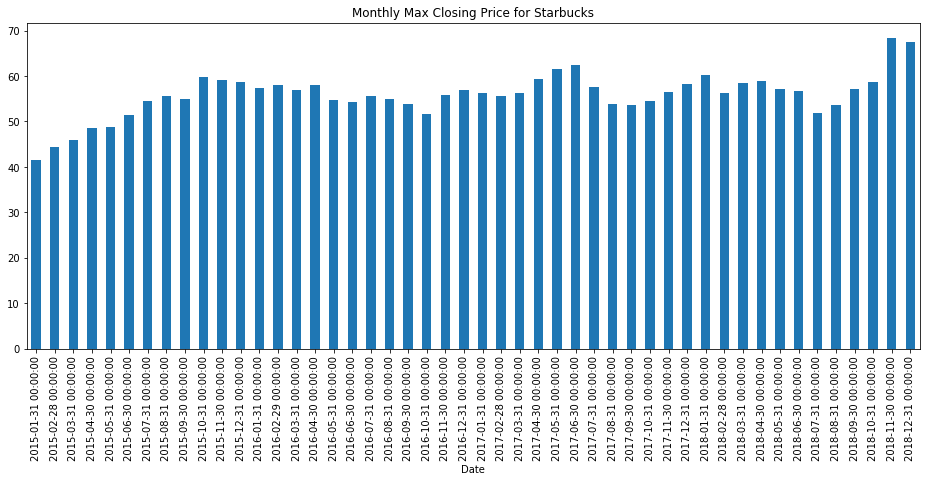

In [19]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

The above plot is for finding the max values for each month for every year using the resample method.

The perk of having the date column as index is that by default the x axis will become dates easily

In [77]:
df['month']= df.index.strftime('%B')

In [78]:
df.head()

,Close,Volume,month
Date,,,
2015-01-02,38.0061,6906098,January
2015-01-05,37.2781,11623796,January
2015-01-06,36.9748,7664340,January
2015-01-07,37.8848,9732554,January
2015-01-08,38.4961,13170548,January


C:\Users\munikrishnan\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


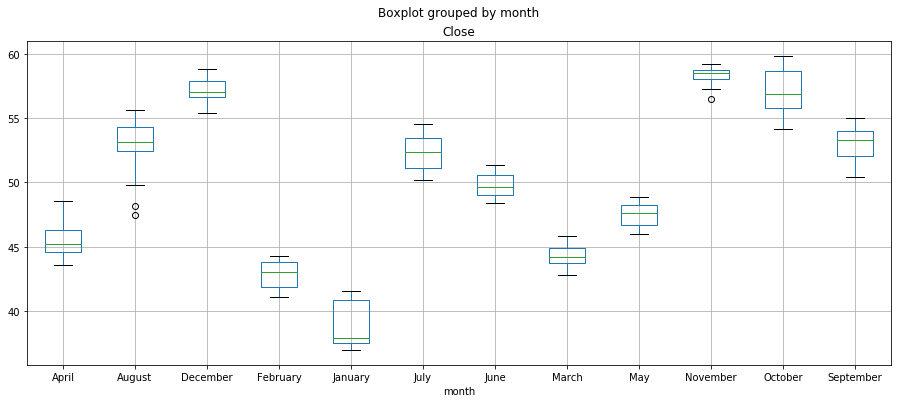

In [81]:
df['2015'].boxplot(column = 'Close',by='month',figsize= (15,6));

In [82]:
df.Close.idxmax()  #returns the index of the max value

Timestamp('2018-11-08 00:00:00')

In [83]:
df.Close.idxmin() #returns the index of the min value

Timestamp('2015-01-06 00:00:00')

# Shifting

If we wanna shift our rows by forward 1 or by forward 5 for timeseries problems we can do so y using the ``.shift()`` method of pandas.

We can also go backwards by 1 or 5 by specifying the negative value in the ``.shift()`` method

In [21]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [22]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [23]:
df.shift(1) #shifting  the entire dataframe to 1 row below

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


by shifting one row below we will be creating a NaN row on top and will be skipping one row at the tail, like wise shifting 5 rows will create 5 NaN rows at top and skipping 5 rows at bottom

In [24]:
df.shift(5)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,64.47,15143054.0
2018-12-26,64.92,10523476.0
2018-12-27,64.06,14390146.0


In [46]:
df.shift(-5)

,Close,Volume
Date,,
2015-01-02,37.2361,27556706.0
2015-01-05,37.4415,10021486.0
2015-01-06,37.7401,11040702.0
2015-01-07,37.5301,9295084.0
2015-01-08,37.1381,8126602.0
...,...,...
2018-12-24,NaN,NaN
2018-12-26,NaN,NaN
2018-12-27,NaN,NaN


Notice that the bottom values are moved upward, thereby having NaN values at bottom and the top 5 rows will be skipped

# Seasonal Decomposition

In many of the time-series data we will have all the time series properties such as trend, seasonality and cyclical patterns. But is there a way to see these properties seperately inorder to confirm and analyze??. Yes, there is a way which is known as ``Hodrick-Presscot`` filter which dismantles the time series to seperate these trend and seasonality from the data.

Fortunately the statsmodel package of python provides a special method to do the same (it is also known as <font color='red'>ETS decomposition -Error Trend Sesonality decomposition </font>)

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [113]:
df= pd.read_csv(r"Downloads\AirPassengers.csv",index_col='Month',parse_dates=True)

In [114]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [116]:
df.dropna(inplace=True)

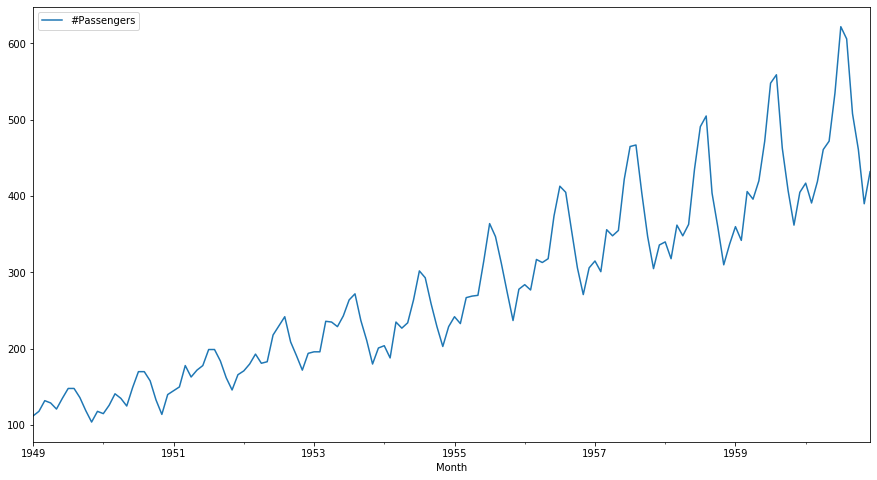

In [126]:
df.plot(figsize= (15,8));

The above figure is the raw data with all trend, seasonality and other residuals mixed. We can use the seasonal decomposition to seperate these properties. But we don't know whether the trend and seasonality are additive in nature or multiplicative , so we will examine one by one

In [127]:
results= seasonal_decompose(df, model='additive')

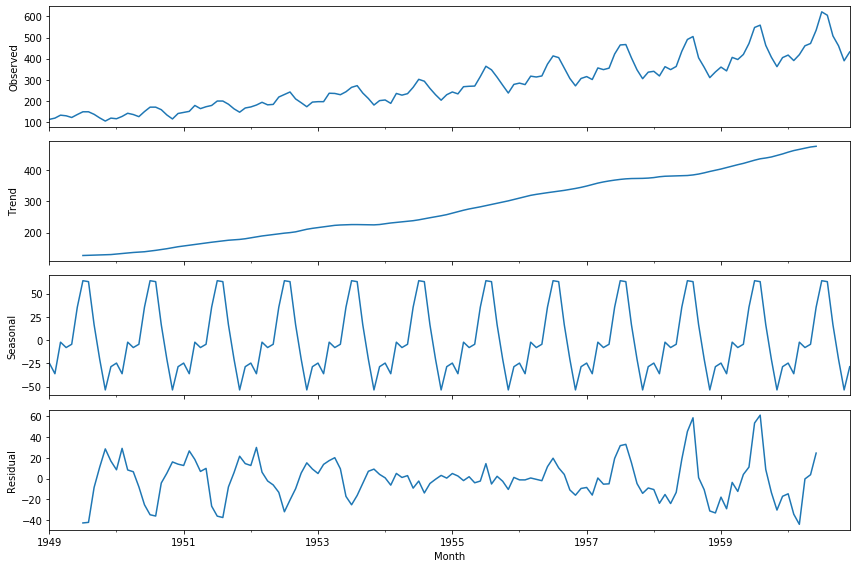

In [128]:
from pylab import rcParams
rcParams['figure.figsize']= 12,8
results.plot();

As we can see the trend and the seasonlaity components of the time series are seperated and plotted above 

The residual plot represents whats leftover after removing the trend and seasonality 

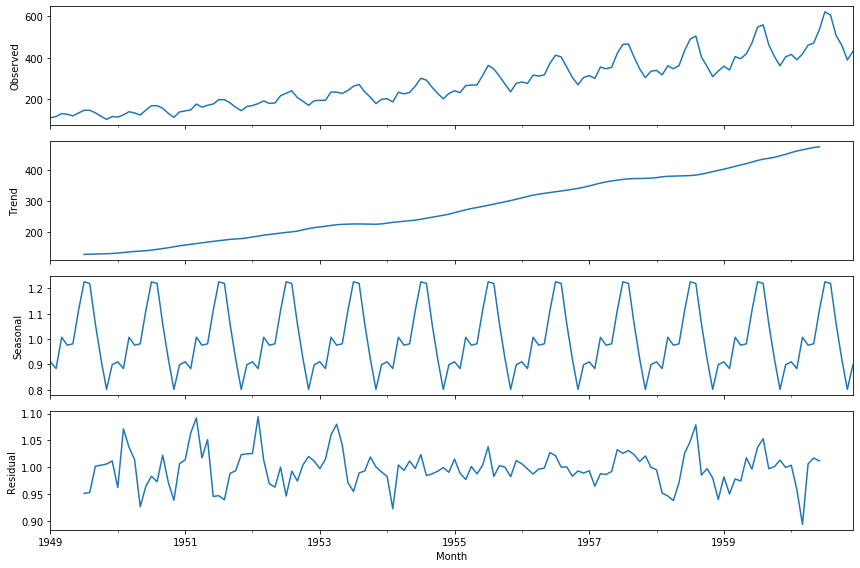

In [129]:
results= seasonal_decompose(df, model='multiplicative')
from pylab import rcParams
rcParams['figure.figsize']= 12,8
results.plot();

# Exponential Smoothing

Exponenital smoothing is a time-series forecasting model which is similar to ARMA time-series models


## Simple Exponential Smoothing

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [170]:
df= pd.read_csv(r"C:\Univ\3rd Semester\Data science\Tiime Series\UDEMY_TSA_FINAL\Data\airline_passengers.csv",index_col='Month',parse_dates=True)

In [171]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


from the table we can see that the data has been recorded monthly only

In [172]:
df.dropna(inplace=True)

In [173]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [174]:
df=df.asfreq('MS')

In [175]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [176]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np
span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
#when we are entering optimized=False then we need to pass the smoothing_level parameter value otherwise the model itself will select a optimal best parameter
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


After fitting the time series model with single exponential smoothing we can see that the fitted(predicted-SES12) values are somewhat similar to the original values(Thousands of Passengers). we can see that by plotting the original data and SES12 data side by side

<div class="alert alert-danger"><strong>NOTE:</strong> For some reason, when <tt>optimized=False</tt> is passed into <tt>.fit()</tt>, the statsmodels <tt>SimpleExpSmoothing</tt> function shifts fitted values down one row. We fix this by adding <tt>.shift(-1)</tt> after <tt>.fittedvalues</tt></div>

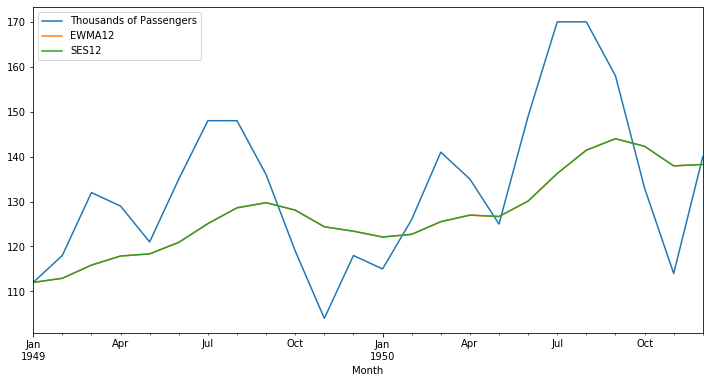

In [177]:
df[['Thousands of Passengers','EWMA12','SES12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In the above figure the EWMA12 and SES12 was overlapped on one another as both values are similar

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 3 columns):
Thousands of Passengers    144 non-null int64
EWMA12                     144 non-null float64
SES12                      143 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB



## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [185]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'].astype('float64'), trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237778
1949-02-01,118,112.923077,112.923077,120.237778
1949-03-01,132,115.857988,115.857988,134.237778
1949-04-01,129,117.879836,117.879836,131.237778
1949-05-01,121,118.359861,118.359861,123.237778


<u>For the exponential smoothing paramteres</u>

<font color='red'>trend </font>:  'add' or 'mul' or 'None' --> None will be used to not add the trend parameter

<font color='red'>damped</font>: True or False

<font color='red'>seasonal</font>: 'add' or 'mul' or 'None'--> None will be used to not add the trend parameter

<font color='red'>seasonal_period</font>: num value

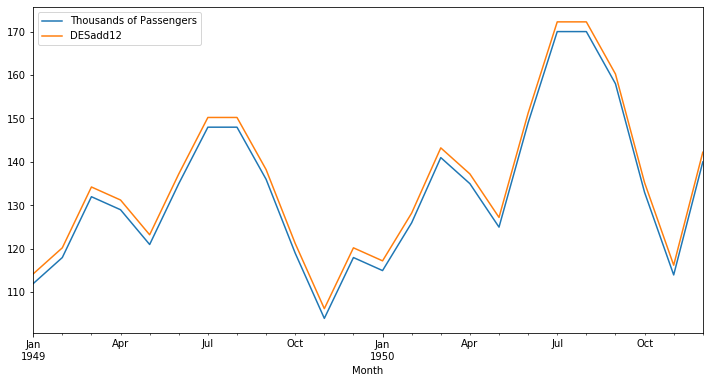

In [189]:
df[['Thousands of Passengers','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps.

In [187]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'].astype('float64'), trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237778,112.049247
1949-02-01,118,112.923077,112.923077,120.237778,118.051885
1949-03-01,132,115.857988,115.857988,134.237778,132.058041
1949-04-01,129,117.879836,117.879836,131.237778,129.056722
1949-05-01,121,118.359861,118.359861,123.237778,121.053204


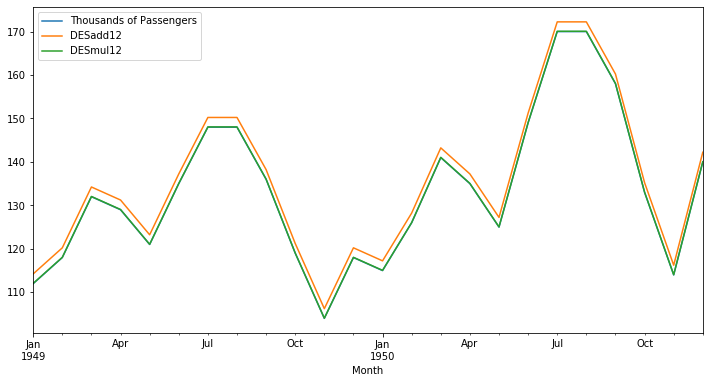

In [190]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.


## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 



In [191]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'].astype('float64'),trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\munikrishnan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237778,112.049247,113.081288
1949-02-01,118,112.923077,112.923077,120.237778,118.051885,120.550753
1949-03-01,132,115.857988,115.857988,134.237778,132.058041,135.527339
1949-04-01,129,117.879836,117.879836,131.237778,129.056722,133.155076
1949-05-01,121,118.359861,118.359861,123.237778,121.053204,125.656129


<u>For the exponential smoothing paramteres</u>

<font color='red'>trend </font>:  'add' or 'mul' or 'None' --> None will be used to not add the trend parameter

<font color='red'>damped</font>: True or False

<font color='red'>seasonal</font>: 'add' or 'mul' or 'None'--> None will be used to not add the trend parameter

<font color='red'>seasonal_period</font>: num value

In [192]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'].astype('float64'),trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.237778,112.049247,113.081288,111.588304
1949-02-01,118,112.923077,112.923077,120.237778,118.051885,120.550753,118.843579
1949-03-01,132,115.857988,115.857988,134.237778,132.058041,135.527339,133.335405
1949-04-01,129,117.879836,117.879836,131.237778,129.056722,133.155076,127.916259
1949-05-01,121,118.359861,118.359861,123.237778,121.053204,125.656129,120.985924


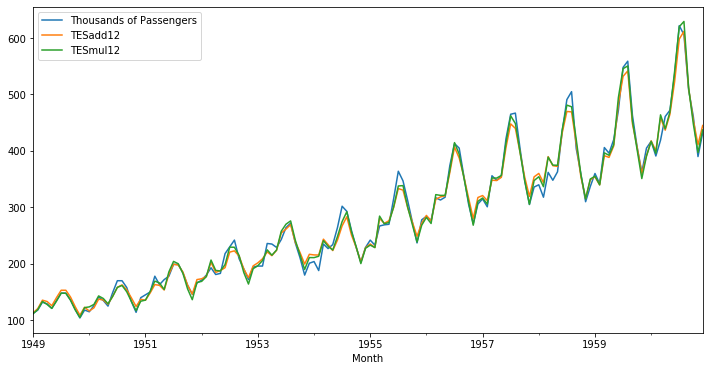

In [193]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

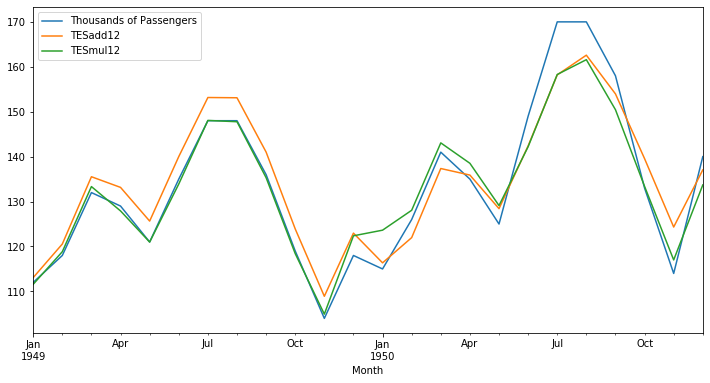

In [194]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, you might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. The key here is to consider what comes next - <em>forecasting</em>. We'll see that having the ability to predict fluctuating seasonal patterns greatly improves our forecast.

# Forecasting

So far we have seen how the exponential smoothing fits the data in the training mode and we plotted the fitted values along with the original values to confirm the performance.

Now we are gonna forecast the data for the future but before that we are gonna split the data into training and test without shuffling as the time series has to maintain its chronological order for the pattern and seasonal properties. Usually the train test split ratio will be 80:20

In [207]:
train_data = df[:int(len(df)*0.8)]

In [208]:
test_data =df[int(len(df)*0.8):]

In [209]:
train_data.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.237778,112.049247,113.081288,111.588304
1949-02-01,118,112.923077,112.923077,120.237778,118.051885,120.550753,118.843579
1949-03-01,132,115.857988,115.857988,134.237778,132.058041,135.527339,133.335405
1949-04-01,129,117.879836,117.879836,131.237778,129.056722,133.155076,127.916259
1949-05-01,121,118.359861,118.359861,123.237778,121.053204,125.656129,120.985924


In [210]:
test_data.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1958-08-01,505,404.249730,404.249730,507.237778,505.222050,469.141346,478.250560
1958-09-01,404,404.211310,404.211310,406.237778,404.177640,412.689573,420.116076
1958-10-01,359,397.255724,397.255724,361.237778,359.157854,353.727442,357.456943
1958-11-01,310,383.831767,383.831767,312.237778,310.136308,315.762613,314.787042
1958-12-01,337,376.626879,376.626879,339.237778,337.148180,348.958543,350.272198


In [212]:
train_data.shape

(115, 7)

In [213]:
test_data.shape

(29, 7)

In [204]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [211]:
model1 = ExponentialSmoothing(train_data['Thousands of Passengers'].astype('float64'), trend='mul',seasonal='mul',seasonal_periods=12).fit()  

C:\Users\munikrishnan\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [214]:
test_data['forecast']= model1.forecast(29) #we are gonna forecase 29 values into the future as we are having the exact 29 values 
#as test data to measure the model's performance

C:\Users\munikrishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [216]:
test_data.head(10)

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12,forecast
Month,,,,,,,,
1958-08-01,505,404.249730,404.249730,507.237778,505.222050,469.141346,478.250560,478.840182
1958-09-01,404,404.211310,404.211310,406.237778,404.177640,412.689573,420.116076,412.012511
1958-10-01,359,397.255724,397.255724,361.237778,359.157854,353.727442,357.456943,353.786931
1958-11-01,310,383.831767,383.831767,312.237778,310.136308,315.762613,314.787042,311.285277
1958-12-01,337,376.626879,376.626879,339.237778,337.148180,348.958543,350.272198,347.413604
1959-01-01,360,374.068898,374.068898,362.237778,360.158293,354.157787,355.110943,356.878966
1959-02-01,342,369.135221,369.135221,344.237778,342.150379,339.890011,339.833343,340.481446
1959-03-01,406,374.806726,374.806726,408.237778,406.178520,391.553389,396.573665,397.243710
1959-04-01,396,378.067230,378.067230,398.237778,396.174123,388.497407,392.261254,390.922511


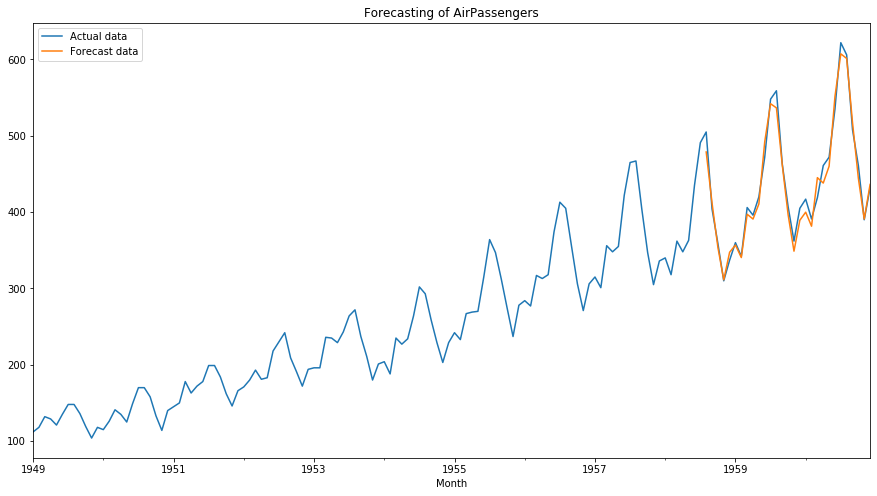

In [220]:
df['Thousands of Passengers'].plot(figsize=(15,8), label='Actual data', title='Forecasting of AirPassengers')
test_data['forecast'].plot(label='Forecast data')
plt.legend()
plt.show()

We can see that the forecast data is almost same on top on the original data , thus we can conclude that the model did performed well on predicting the future data.

Usually after the successfull forecast of the test data we then use the whole dataset to train the model and deploy it.

Here we need to examine the residual of the model(extracted from training data) to check whether is there any room for improvement or not.

### Residual examination

In [238]:
train_data['resid']=model1.resid  #residual is nothing but the diff between the actual and predicted values

C:\Users\munikrishnan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


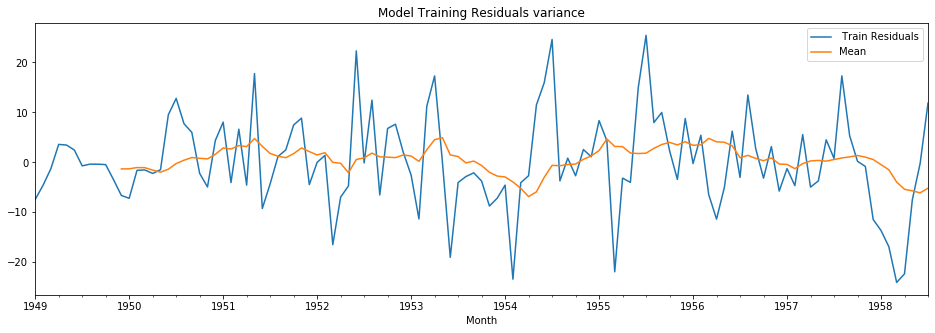

In [246]:
train_data['resid'].plot(figsize=(16,5),title='Model Training Residuals variance', label=' Train Residuals',legend=True)
train_data['resid'].rolling(12).mean().plot(legend=True, label='Mean')
plt.show()

The model residual almost resembles like a white noise with the following properties:
    1. Normally distributed
    2. Mean (Zero)
    3. Variance(constant)
    4. IID (Independent and identically distributed)

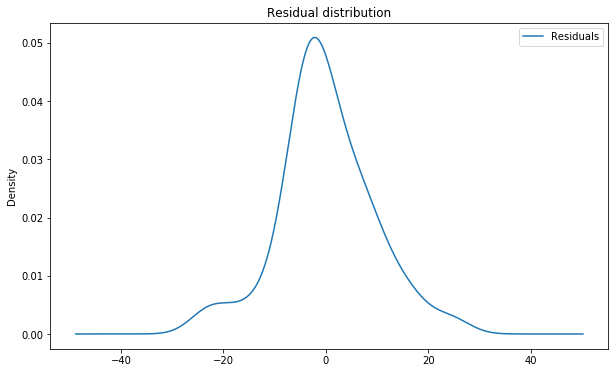

In [235]:
train_data['resid'].plot.kde(title= 'Residual distribution', figsize= (10,6), label='Residuals',legend=True);

In [254]:
print(f"The mean of the residual is : {train_data['resid'].mean()}  \nThe Variance of the residual is : {train_data['resid'].var()}")

The mean of the residual is : 0.07357693198062001  
The Variance of the residual is : 85.72661148907561


## Model Evaluation Metrics

As like regression models here also we are gonna use MSE, RMSE and R2 metrics to evaluate the model 

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [263]:
print(f"""\nThe Mean Absolute Error of the Model is : {round(mean_absolute_error(test_data['Thousands of Passengers'], test_data['forecast']),3)}  \n
The Mean Squared Error of the Model is : {round(mean_squared_error(test_data['Thousands of Passengers'], test_data['forecast']),3)}   \n
The Root Mean Squared Error of the Model is : {round(np.sqrt(mean_squared_error(test_data['Thousands of Passengers'], test_data['forecast'])),3) }  \n
The R2 score is : {round(r2_score(test_data['Thousands of Passengers'], test_data['forecast']),3)}""")


The Mean Absolute Error of the Model is : 11.124  

The Mean Squared Error of the Model is : 178.833   

The Root Mean Squared Error of the Model is : 13.373  

The R2 score is : 0.971
      
      


As we can see above that the model performs really well when compared with the mean and stdev of the dataset